In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iarunava/cell-images-for-detecting-malaria")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/iarunava/cell-images-for-detecting-malaria/versions/1


In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

In [ ]:
dataset_dir = "/root/.cache/kagglehub/datasets/iarunava/cell-images-for-detecting-malaria/versions/1/cell_images"
subdirs = ['Uninfected', 'Parasitized']

In [ ]:
train_dataset = image_dataset_from_directory(
    dataset_dir,
    image_size=(128, 128),
    batch_size=32,
    label_mode='binary',
    validation_split=0.2,
    subset="training",
    seed=123,
    class_names=subdirs
)

val_dataset = image_dataset_from_directory(
    dataset_dir,
    image_size=(128, 128),
    batch_size=32,
    label_mode='binary',
    validation_split=0.2,
    subset="validation",
    seed=123,
    class_names=subdirs
)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


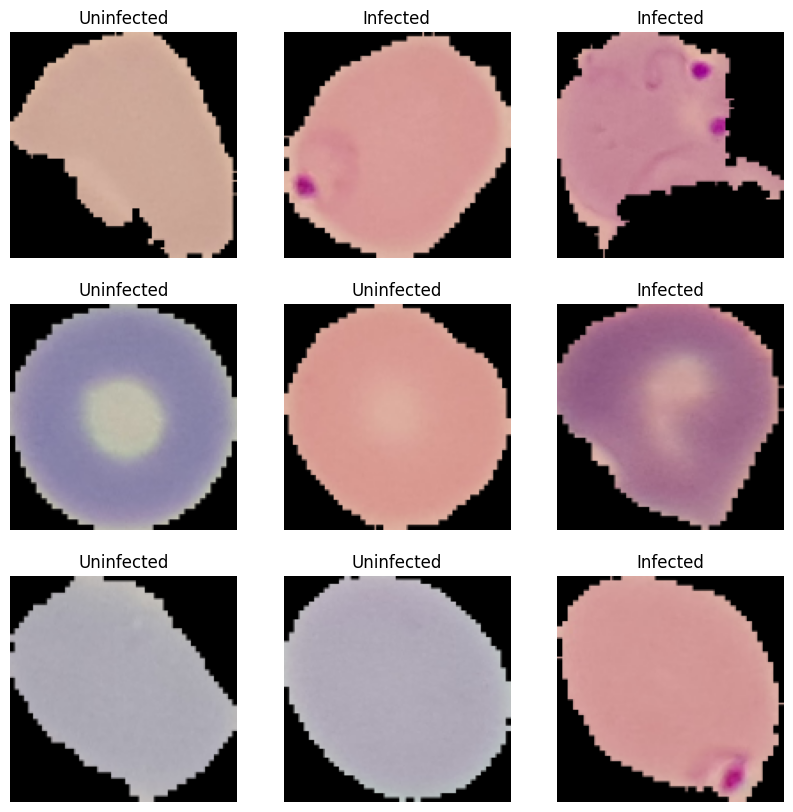

In [ ]:
image_batch, label_batch = next(iter(train_dataset))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title("Infected" if label_batch[i].numpy() == 1 else "Uninfected")
    plt.axis("off")
plt.show()

In [ ]:
simple_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

simple_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_simple = simple_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20
)

Epoch 1/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.5877 - loss: 127.0118 - val_accuracy: 0.5861 - val_loss: 2.0295
Epoch 2/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.7393 - loss: 0.9170 - val_accuracy: 0.7302 - val_loss: 0.7959
Epoch 3/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.8217 - loss: 0.4620 - val_accuracy: 0.7389 - val_loss: 0.7634
Epoch 4/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.8706 - loss: 0.3294 - val_accuracy: 0.7452 - val_loss: 0.7246
Epoch 5/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8955 - loss: 0.2701 - val_accuracy: 0.7518 - val_loss: 0.7581
Epoch 6/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9255 - loss: 0.1938 - val_accuracy: 0.7935 - val_loss: 0.7039
Epoch 7/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.9511 - loss: 0.1389 - val_accuracy: 0.8049 - val_loss: 0.6922
Epoch 8/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.9665 - loss: 0.1065 

In [ ]:
simple_model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

simple_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

alexnet_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

alexnet_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_simple = simple_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=[early_stopping]
)

history_alexnet = alexnet_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5956 - loss: 7.7263 - val_accuracy: 0.7224 - val_loss: 0.5542
Epoch 2/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.7728 - loss: 0.5001 - val_accuracy: 0.8971 - val_loss: 0.2788
Epoch 3/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.8910 - loss: 0.2958 - val_accuracy: 0.9178 - val_loss: 0.2240
Epoch 4/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.9232 - loss: 0.2157 - val_accuracy: 0.9263 - val_loss: 0.2234
Epoch 5/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.9434 - loss: 0.1715 - val_accuracy: 0.9242 - val_loss: 0.2155
Epoch 6/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.9530 - loss: 0.1313 - val_accuracy: 0.9296 - val_loss: 0.2363
Epoch 7/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.9620 - loss: 0.1124 - val_accuracy: 0.9338 - val_loss: 0.2352
Epoch 8/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.9730 - loss: 0.0792 - 

In [ ]:
y_true = np.concatenate([y for x, y in val_dataset], axis=0)
y_pred_simple = (simple_model.predict(val_dataset) > 0.5).astype("int32")
y_pred_alexnet = (alexnet_model.predict(val_dataset) > 0.5).astype("int32")

173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step


In [ ]:
print("Simple CNN Model Classification Report:\n", classification_report(y_true, y_pred_simple))
print("AlexNet Model Classification Report:\n", classification_report(y_true, y_pred_alexnet))

Simple CNN Model Classification Report:
               precision    recall  f1-score   support

         0.0       0.49      0.49      0.49      2709
         1.0       0.51      0.51      0.51      2802

    accuracy                           0.50      5511
   macro avg       0.50      0.50      0.50      5511
weighted avg       0.50      0.50      0.50      5511

AlexNet Model Classification Report:
               precision    recall  f1-score   support

         0.0       0.48      0.48      0.48      2709
         1.0       0.50      0.49      0.49      2802

    accuracy                           0.49      5511
   macro avg       0.49      0.49      0.49      5511
weighted avg       0.49      0.49      0.49      5511



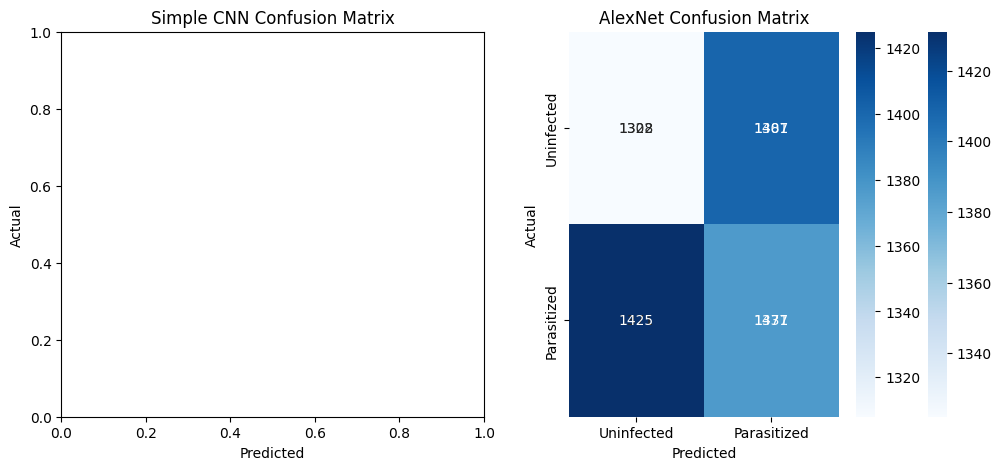

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plot_confusion_matrix(y_true, y_pred_simple, "Simple CNN Confusion Matrix", axes[0])
plot_confusion_matrix(y_true, y_pred_alexnet, "AlexNet Confusion Matrix", axes[1])
plt.show()

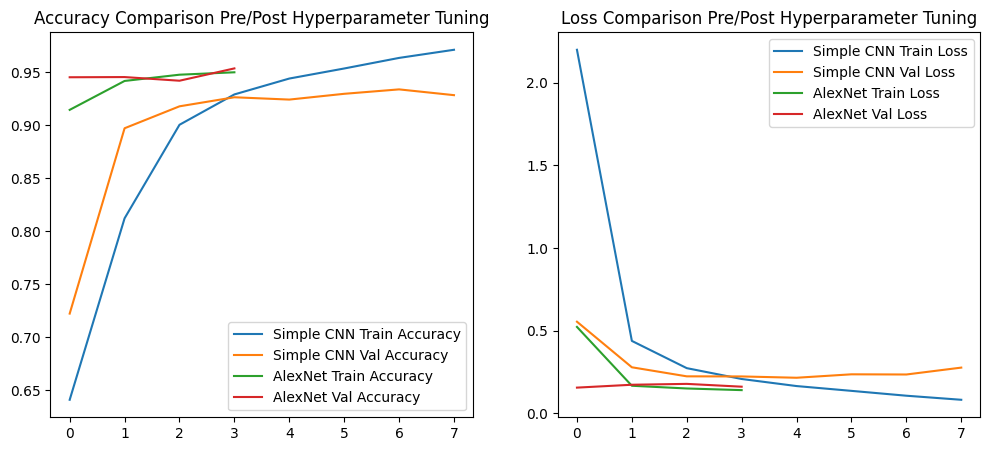

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_simple.history['accuracy'], label='Simple CNN Train Accuracy')
plt.plot(history_simple.history['val_accuracy'], label='Simple CNN Val Accuracy')
plt.plot(history_alexnet.history['accuracy'], label='AlexNet Train Accuracy')
plt.plot(history_alexnet.history['val_accuracy'], label='AlexNet Val Accuracy')
plt.legend()
plt.title('Accuracy Comparison Pre/Post Hyperparameter Tuning')

plt.subplot(1, 2, 2)
plt.plot(history_simple.history['loss'], label='Simple CNN Train Loss')
plt.plot(history_simple.history['val_loss'], label='Simple CNN Val Loss')
plt.plot(history_alexnet.history['loss'], label='AlexNet Train Loss')
plt.plot(history_alexnet.history['val_loss'], label='AlexNet Val Loss')
plt.legend()
plt.title('Loss Comparison Pre/Post Hyperparameter Tuning')

plt.show()

In [ ]:
simple_model.save("simple_cnn_model_tuned.h5")
alexnet_model.save("alexnet_cnn_model_tuned.h5")